⬇️ Downloading data for all tickers...


[*********************100%***********************]  8 of 8 completed


✅ Data shape after dropna: (1819, 8)

🔗 Running cointegration tests...


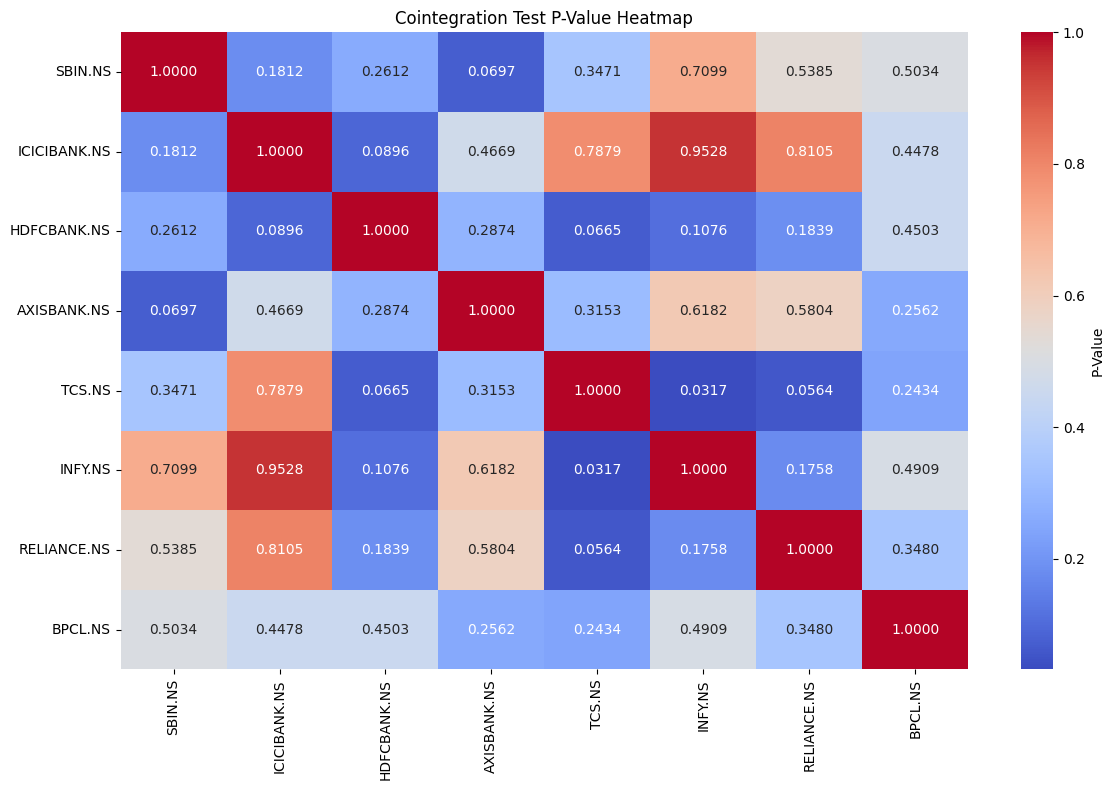


✅ Cointegrated pairs (p-value < 0.05):
TCS.NS & INFY.NS → p-value: 0.0317


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
from itertools import combinations
from datetime import datetime

# ========= PARAMETERS =========
start_date = "2018-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
tickers = ["SBIN.NS", "ICICIBANK.NS", "HDFCBANK.NS", "AXISBANK.NS", "TCS.NS", "INFY.NS", "RELIANCE.NS", "BPCL.NS"]

# ========= DATA DOWNLOAD =========
print("⬇️ Downloading data for all tickers...")
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)["Close"]
data.dropna(axis=0, how='any', inplace=True)
print(f"✅ Data shape after dropna: {data.shape}")

# ========= COINTEGRATION TEST =========
pvalues = pd.DataFrame(np.ones((len(tickers), len(tickers))), columns=tickers, index=tickers)
cointegrated_pairs = []

print("\n🔗 Running cointegration tests...")
for (ticker1, ticker2) in combinations(tickers, 2):
    score, pvalue, _ = coint(data[ticker1], data[ticker2])
    pvalues.loc[ticker1, ticker2] = pvalue
    pvalues.loc[ticker2, ticker1] = pvalue  # symmetric
    if pvalue < 0.05:
        cointegrated_pairs.append((ticker1, ticker2, round(pvalue, 4)))

# ========= DISPLAY HEATMAP =========
plt.figure(figsize=(12, 8))
sns.heatmap(pvalues, annot=True, cmap="coolwarm", fmt=".4f", cbar_kws={'label': 'P-Value'})
plt.title("Cointegration Test P-Value Heatmap")
plt.tight_layout()
plt.show()

# ========= DISPLAY COINTEGRATED PAIRS =========
if cointegrated_pairs:
    print("\n✅ Cointegrated pairs (p-value < 0.05):")
    for pair in cointegrated_pairs:
        print(f"{pair[0]} & {pair[1]} → p-value: {pair[2]}")
else:
    print("\n❌ No cointegrated pairs found with p-value < 0.05.")
